# Home work no.1
>## professor : Dr. Vahid Khazaei nezhad
# Team Members :
- Saeed Tizkar
- Pooriya Amini
- Mohammad Elahi

# Import and Loading data

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

iris_ds = pd.read_csv("Data/iris.csv");
iris_ds

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Change Columns name

In [39]:
iris_ds.columns = ["sepal_len", "sepal_wd", "petal_len", "petal_wd", "class"] 
iris_ds

,sepal_len,sepal_wd,petal_len,petal_wd,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Dataset Info

In [40]:
iris_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sepal_len  150 non-null    float64
 1   sepal_wd   150 non-null    float64
 2   petal_len  150 non-null    float64
 3   petal_wd   150 non-null    float64
 4   class      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [41]:
iris_ds.describe()

,sepal_len,sepal_wd,petal_len,petal_wd
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Duplicated rows

In [42]:
iris_ds.duplicated() 

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

# Remove duplicated rows

In [43]:
iris_ds.drop_duplicates() 

,sepal_len,sepal_wd,petal_len,petal_wd,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Some Simple EDA 

>## Quartile

In [44]:
iris_ds.groupby("class").describe().T 

class            Iris-setosa  Iris-versicolor  Iris-virginica
sepal_len count    50.000000        50.000000       50.000000
          mean      5.006000         5.936000        6.588000
          std       0.352490         0.516171        0.635880
          min       4.300000         4.900000        4.900000
          25%       4.800000         5.600000        6.225000
          50%       5.000000         5.900000        6.500000
          75%       5.200000         6.300000        6.900000
          max       5.800000         7.000000        7.900000
sepal_wd  count    50.000000        50.000000       50.000000
          mean      3.418000         2.770000        2.974000
          std       0.381024         0.313798        0.322497
          min       2.300000         2.000000        2.200000
          25%       3.125000         2.525000        2.800000
          50%       3.400000         2.800000        3.000000
          75%       3.675000         3.000000        3.175000
          max       4.400000         3.400000        3.800000
petal_len count    50.000000        50.000000       50.000000
          mean      1.464000         4.260000        5.552000
          std       0.173511         0.469911        0.551895
          min       1.000000         3.000000        4.500000
          25%       1.400000         4.000000        5.100000
          50%       1.500000         4.350000        5.550000
          75%       1.575000         4.600000        5.875000
          max       1.900000         5.100000        6.900000
petal_wd  count    50.000000        50.000000       50.000000
          mean      0.244000         1.326000        2.026000
          std       0.107210         0.197753        0.274650
          min       0.100000         1.000000        1.400000
          25%       0.200000         1.200000        1.800000
          50%       0.200000         1.300000        2.000000
          75%       0.300000         1.500000        2.300000
          max       0.600000         1.800000        2.500000

>## Variance

In [45]:
iris_ds.var(numeric_only=True)

sepal_len    0.685694
sepal_wd     0.188004
petal_len    3.113179
petal_wd     0.582414
dtype: float64

>## Mean

In [46]:
iris_ds.mean(numeric_only=True)

sepal_len    5.843333
sepal_wd     3.054000
petal_len    3.758667
petal_wd     1.198667
dtype: float64

>## Median

In [47]:
iris_ds.median(numeric_only=True) # میانه - مدیان

sepal_len    5.80
sepal_wd     3.00
petal_len    4.35
petal_wd     1.30
dtype: float64

>## Standard Deviation (STD)

In [48]:
iris_ds.std(numeric_only=True) # انحراف معیار

sepal_len    0.828066
sepal_wd     0.433594
petal_len    1.764420
petal_wd     0.763161
dtype: float64

>## Covariance

In [49]:
iris_ds.cov(numeric_only=True) # کوواریانس

,sepal_len,sepal_wd,petal_len,petal_wd
sepal_len,0.685694,-0.039268,1.273682,0.516904
sepal_wd,-0.039268,0.188004,-0.321713,-0.117981
petal_len,1.273682,-0.321713,3.113179,1.296387
petal_wd,0.516904,-0.117981,1.296387,0.582414


>## Correlation

In [50]:
iris_ds.corr(numeric_only=True) # کورریلیشن

,sepal_len,sepal_wd,petal_len,petal_wd
sepal_len,1.000000,-0.109369,0.871754,0.817954
sepal_wd,-0.109369,1.000000,-0.420516,-0.356544
petal_len,0.871754,-0.420516,1.000000,0.962757
petal_wd,0.817954,-0.356544,0.962757,1.000000


>## Total Variance

In [51]:
from pandas.api.types import is_numeric_dtype
def total_variance (matrix): # توتال واریانس برای داده یک بعدی
    for column in matrix.columns:
        if not is_numeric_dtype(iris_ds[column]):
            continue;
        mean = matrix[column].mean();
        temp_sum = 0;
        for index in matrix[column]:
            temp_sum += (index - mean);
        total_var = temp_sum / matrix[column].size;
        print( column + "\t" + str(total_var));
            
total_variance(iris_ds)
iris_ds

sepal_len	-3.315866100213801e-16
sepal_wd	-2.3980817331903383e-16
petal_len	3.345472047537138e-16
petal_wd	2.1908401019269756e-16


,sepal_len,sepal_wd,petal_len,petal_wd,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Dataframe Plotting

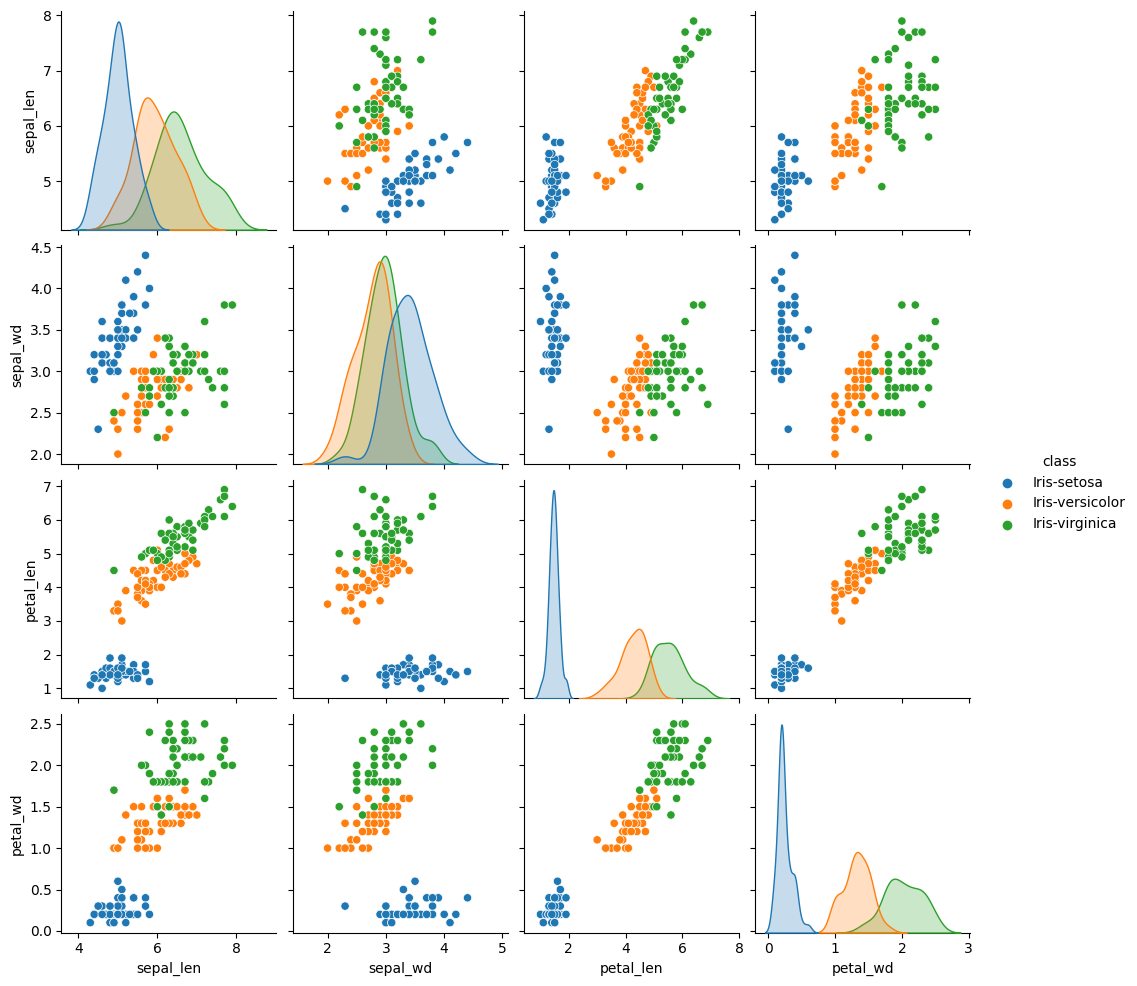

In [52]:
sns.pairplot(iris_ds, hue='class')
plt.show()

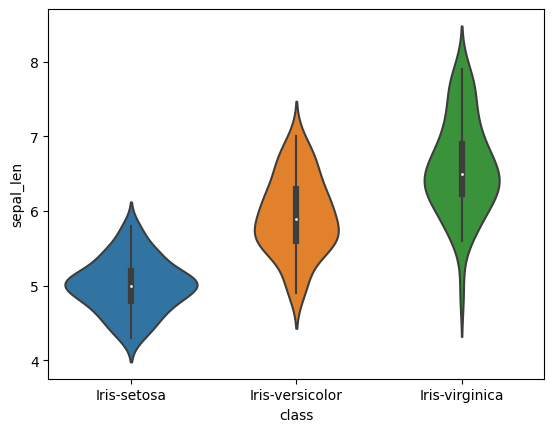

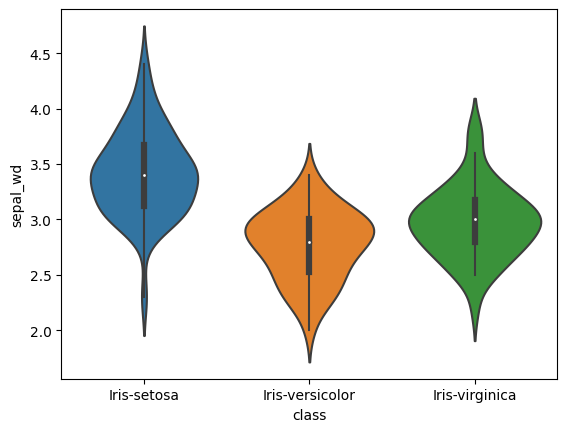

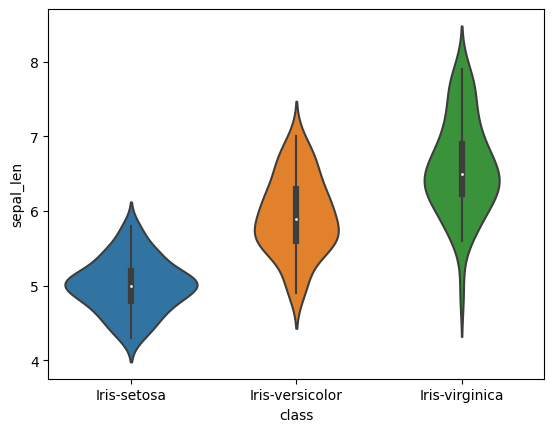

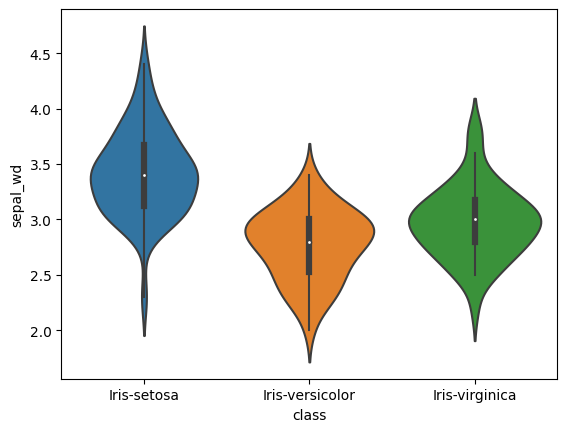

In [54]:
sns.violinplot(x='class', y='sepal_len', data=iris_ds)
plt.show()
sns.violinplot(x='class', y='sepal_wd', data=iris_ds)
plt.show()
sns.violinplot(x='class', y='sepal_len', data=iris_ds)
plt.show()
sns.violinplot(x='class', y='sepal_wd', data=iris_ds)
plt.show()